In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_5_data_cleaned.csv")
df.head()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'is_Winter', 'is_Spring', 'is_Summer',
       'is_Autumn', 'is_Holiday', 'is_Functioning_day', 'Month', 'Day',
       'int_date'],
      dtype='object')

In [5]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

# Bi-directional elimination as a wrapper method. 

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Using build-in fuction in python

# No of features =8 and LinearRegression ML algorithm

In [7]:
sffs = SFS(LinearRegression(),
         k_features=8,
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

('Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'is_Winter',
 'is_Autumn',
 'is_Functioning_day')

In [8]:
X=df[['Hour','Temperature(C)','Humidity(%)','Solar Radiation (MJ/m2)','Rainfall(mm)','is_Winter','is_Autumn','is_Functioning_day']]

In [9]:
y = df['Rented Bike Count']
X.head()

,Hour,Temperature(C),Humidity(%),Solar Radiation (MJ/m2),Rainfall(mm),is_Winter,is_Autumn,is_Functioning_day
0,0,-5.2,37,0.0,0.0,True,False,True
1,1,-5.5,38,0.0,0.0,True,False,True
2,2,-6.0,39,0.0,0.0,True,False,True
3,3,-6.2,40,0.0,0.0,True,False,True
4,4,-6.0,36,0.0,0.0,True,False,True


In [10]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [11]:
#splitting data into train,validation and test datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 8)
(7008, 1)
(876, 8)
(876, 1)
(876, 8)
(876, 1)


(None, None)

# PART-2 BEST MODEL - RANDOM FOREST

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
best_model_feature8 = RandomForestRegressor(n_estimators= 300, max_features= 'log2', max_depth= 22,bootstrap=True)
best_model_feature8.fit(X_train,y_train)
y_test_pred = best_model_feature8.predict(X_test)
mse = mean_squared_error(y_test_pred, y_test)
print("MSE:", mse)
best_model_feature8.score(X_test, y_test)

MSE: 0.0038286137197577133


0.8728534523460072

In [13]:
#Error on the validation set
#model evaluation on validation dataset
y_valid_pred = best_model_feature8.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.005191754712149682
The mean absolute error is 0.04482832331944566
The root mean sqaured error is 0.07205383204347762


In [14]:
#Error on the test dataset
y_test_pred = best_model_feature8.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.0038286137197577133
The mean absolute error is 0.038613754295022035
The root mean sqaured error is 0.06187579267983331


R^2 is 0.8728534523460072
RMSE is: 0.06187579267983331


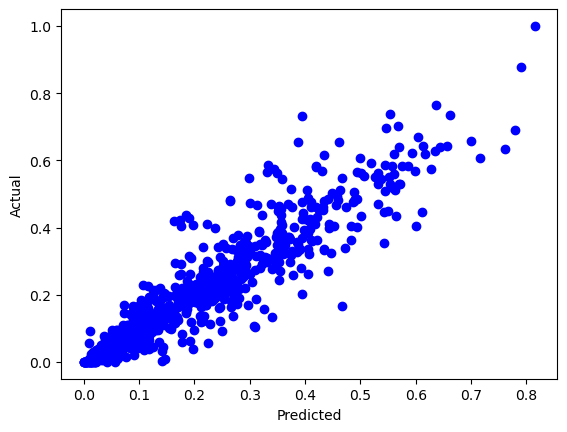

In [15]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {best_model_feature8.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

# PART-3 BEST MODEL - DEEP LEARNING

In [16]:
from keras.models import Sequential
from keras.layers import Dense
X_train, X_test, y_train, y_test = train_test_split(scaled_X,scaled_y, test_size = 0.2, random_state = 1111)

In [17]:
# We decalred a function for creating a model.
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
def build_model3_five_hidden_layers():
    
    model = Sequential()

    model.add(Dense(128, input_shape = (X_train.shape[1],)))    
    
    model.add(Dense(128,Activation('relu')))                         
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         

    
    model.add(Dense(1))                        
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) 
    
    return model

model3 = build_model3_five_hidden_layers()

history = model3.fit(X_train, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.0169 - mae: 0.0902 - mse: 0.0169 - val_loss: 0.0166 - val_mae: 0.0827 - val_mse: 0.0166
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0122 - mae: 0.0754 - mse: 0.0122 - val_loss: 0.0287 - val_mae: 0.1217 - val_mse: 0.0287
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0683 - mse: 0.0103 - val_loss: 0.0084 - val_mae: 0.0593 - val_mse: 0.0084
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0091 - mae: 0.0640 - mse: 0.0091 - val_loss: 0.0069 - val_mae: 0.0558 - val_mse: 0.0069
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0082 - mae: 0.0601 - mse: 0.0082 - val_loss: 0.0095 - val_mae: 0.0672 - val_mse: 0.0095
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0078 - mae: 0.0584 - mse: 0.0078 - val_loss: 0.0067 - val_mae: 0.0543 - val_mse: 0.0067
Epoch 7/10

176/176 [==============================] - 0s 1ms/step - loss: 0.0049 - mae: 0.0452 - mse: 0.0049 - val_loss: 0.0057 - val_mae: 0.0519 - val_mse: 0.0057
Epoch 51/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0451 - mse: 0.0048 - val_loss: 0.0056 - val_mae: 0.0497 - val_mse: 0.0056
Epoch 52/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0449 - mse: 0.0048 - val_loss: 0.0081 - val_mae: 0.0561 - val_mse: 0.0081
Epoch 53/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0449 - mse: 0.0048 - val_loss: 0.0069 - val_mae: 0.0549 - val_mse: 0.0069
Epoch 54/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0448 - mse: 0.0048 - val_loss: 0.0061 - val_mae: 0.0521 - val_mse: 0.0061
Epoch 55/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0448 - mse: 0.0048 - val_loss: 0.0054 - val_mae: 0.0478 - val_mse: 0.0054
Epoch 56/100
176/

176/176 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0405 - mse: 0.0040 - val_loss: 0.0047 - val_mae: 0.0434 - val_mse: 0.0047
Epoch 100/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0410 - mse: 0.0040 - val_loss: 0.0046 - val_mae: 0.0439 - val_mse: 0.0046


In [18]:
y_test_pred = model3.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

55/55 [==============================] - 0s 596us/step
The mean squared error is 0.004882149189268884
The mean absolute error is 0.04324177684073472
The root mean sqaured error is 0.06987237787043521


219/219 [==============================] - 0s 632us/step


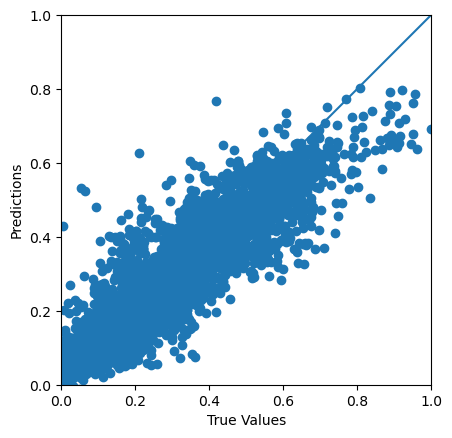

In [19]:
train_predictions = model3.predict(X_train)

a = plt.axes(aspect='equal')
plt.scatter(y_train, train_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# No of features = 6 and RandomForest ML algorithm

In [20]:
sffs = SFS(RandomForestRegressor(),
         k_features=6,
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

('Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Rainfall(mm)',
 'is_Autumn',
 'is_Functioning_day')

In [21]:
X=df[['Hour','Temperature(C)','Humidity(%)','Solar Radiation (MJ/m2)','Rainfall(mm)','is_Functioning_day']]

In [22]:
y = df['Rented Bike Count']
X.head()

,Hour,Temperature(C),Humidity(%),Solar Radiation (MJ/m2),Rainfall(mm),is_Functioning_day
0,0,-5.2,37,0.0,0.0,True
1,1,-5.5,38,0.0,0.0,True
2,2,-6.0,39,0.0,0.0,True
3,3,-6.2,40,0.0,0.0,True
4,4,-6.0,36,0.0,0.0,True


In [23]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [24]:
#splitting data into train,validation and test datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 6)
(7008, 1)
(876, 6)
(876, 1)
(876, 6)
(876, 1)


(None, None)

# PART-2 BEST MODEL - RANDOM FOREST

In [25]:
best_model_feature6 = RandomForestRegressor(n_estimators= 300, max_features= 'log2', max_depth= 22,bootstrap=True)
best_model_feature6.fit(X_train,y_train)
y_test_pred = best_model_feature6.predict(X_test)
mse = mean_squared_error(y_test_pred, y_test)
print("MSE:", mse)
best_model_feature6.score(X_test, y_test)

MSE: 0.0043232263200587845


0.8564275893162876

In [26]:
#Error on the test dataset
y_test_pred = best_model_feature6.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.0043232263200587845
The mean absolute error is 0.0417747560091272
The root mean sqaured error is 0.0657512457681129


R^2 is 0.8564275893162876
RMSE is: 0.0657512457681129


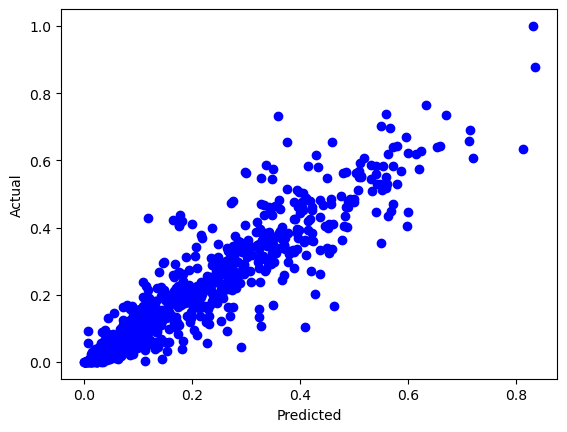

In [27]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {best_model_feature6.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

# PART-3 BEST MODEL - DEEP LEARNING

In [28]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,scaled_y, test_size = 0.2, random_state = 1111)

In [29]:
def build_model3_five_hidden_layers():
    
    model = Sequential()

    model.add(Dense(128, input_shape = (X_train.shape[1],)))    
    
    model.add(Dense(128,Activation('relu')))                         
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         
    
    
    model.add(Dense(128, Activation('relu')))                         

    
    model.add(Dense(1))                        
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) 
    
    return model

model3 = build_model3_five_hidden_layers()

history = model3.fit(X_train, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.0179 - mae: 0.0942 - mse: 0.0179 - val_loss: 0.0122 - val_mae: 0.0761 - val_mse: 0.0122
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0119 - mae: 0.0742 - mse: 0.0119 - val_loss: 0.0122 - val_mae: 0.0747 - val_mse: 0.0122
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0683 - mse: 0.0103 - val_loss: 0.0093 - val_mae: 0.0634 - val_mse: 0.0093
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0091 - mae: 0.0643 - mse: 0.0091 - val_loss: 0.0093 - val_mae: 0.0680 - val_mse: 0.0093
Epoch 5/100
176/176 [==============================] - 0s 999us/step - loss: 0.0086 - mae: 0.0626 - mse: 0.0086 - val_loss: 0.0077 - val_mae: 0.0601 - val_mse: 0.0077
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0080 - mae: 0.0600 - mse: 0.0080 - val_loss: 0.0067 - val_mae: 0.0551 - val_mse: 0.0067
Epoch 7/

176/176 [==============================] - 0s 993us/step - loss: 0.0055 - mae: 0.0486 - mse: 0.0055 - val_loss: 0.0066 - val_mae: 0.0548 - val_mse: 0.0066
Epoch 51/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0054 - mae: 0.0484 - mse: 0.0054 - val_loss: 0.0054 - val_mae: 0.0470 - val_mse: 0.0054
Epoch 52/100
176/176 [==============================] - 0s 996us/step - loss: 0.0054 - mae: 0.0484 - mse: 0.0054 - val_loss: 0.0056 - val_mae: 0.0494 - val_mse: 0.0056
Epoch 53/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0054 - mae: 0.0488 - mse: 0.0054 - val_loss: 0.0060 - val_mae: 0.0501 - val_mse: 0.0060
Epoch 54/100
176/176 [==============================] - 0s 993us/step - loss: 0.0054 - mae: 0.0485 - mse: 0.0054 - val_loss: 0.0061 - val_mae: 0.0515 - val_mse: 0.0061
Epoch 55/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0054 - mae: 0.0483 - mse: 0.0054 - val_loss: 0.0059 - val_mae: 0.0513 - val_mse: 0.0059
Epoch 56/10

176/176 [==============================] - 0s 1ms/step - loss: 0.0046 - mae: 0.0446 - mse: 0.0046 - val_loss: 0.0056 - val_mae: 0.0499 - val_mse: 0.0056
Epoch 100/100
176/176 [==============================] - 0s 1ms/step - loss: 0.0047 - mae: 0.0455 - mse: 0.0047 - val_loss: 0.0059 - val_mae: 0.0514 - val_mse: 0.0059


In [30]:
y_test_pred = model3.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

55/55 [==============================] - 0s 469us/step
The mean squared error is 0.005891546532542553
The mean absolute error is 0.05040650052803591
The root mean sqaured error is 0.07675641036775073


219/219 [==============================] - 0s 472us/step


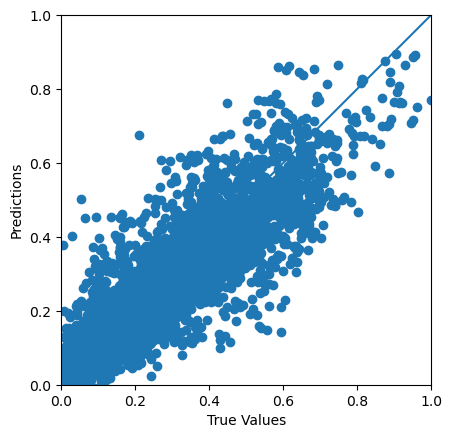

In [31]:
train_predictions = model3.predict(X_train)

a = plt.axes(aspect='equal')
plt.scatter(y_train, train_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)